## Imagens Coloridas

Como já vimos, as imagens manipuladas pelo `scikit-image` são simplesmente arrays do Numpy. Consequentemente, uma grande parte das operações sobre as imagens consistem do uso das funcionalidades do Numpy.

As imagens coloridas seguem este mesmo conceito: são arrays do Numpy, mas com uma dimensão adicional para os canais:

In [24]:
%matplotlib inline

In [25]:
from skimage import data
cat = data.chelsea()
type(cat)

numpy.ndarray

In [26]:
cat.shape

(300, 451, 3)

Isto mostra que `cat` é um imagem com 300x451 pixels, com três canais (vermelho, verde e azul). 
Como antes, podemos acessar e definir os valores dos pixels:

In [27]:
cat[10,20]

array([151, 129, 115], dtype=uint8)

In [28]:
# definindo o pixel na linha 50, coluna 60 como "black"
cat[50,60] = 0

In [29]:
# definindo o pixel na linha 50, coluna 61 como verde
cat[50,61] = [0,255,0] # [red, green, blue]

Nós também podemos utilizar máscaras booleanas 2D para uma imagem colorida 2D, como fizemos para imagens de nível de cinza:

Utilizando uma máscara 2D em uma imagem colorida 2D

In [30]:
import matplotlib.pyplot as plt

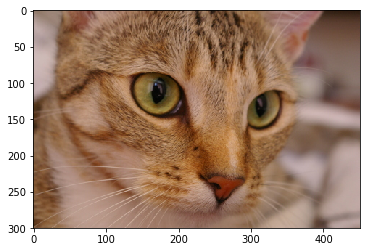

In [31]:
cat = data.chelsea()
plt.imshow(cat)

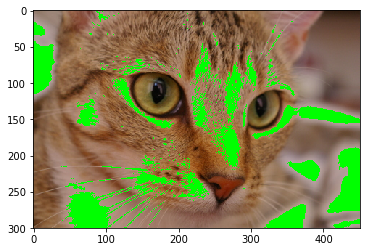

In [32]:
cat = data.chelsea()
reddish = cat[:,:,0] > 180
cat[reddish] = [0,255,0]
plt.imshow(cat)

In [33]:
cat.shape

(300, 451, 3)

In [34]:
reddish.shape

(300, 451)

In [35]:
import skimage.color

In [36]:
cat_orig = data.chelsea()
cat_hsv = skimage.color.convert_colorspace(cat_orig,"RGB","HSV")
cat_g = skimage.color.rgb2gray(cat_orig)

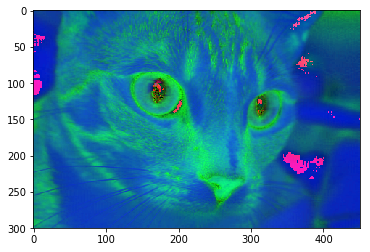

In [37]:
plt.imshow(cat_hsv, cmap = 'hsv')

In [38]:
cat_orig[50,60],cat_hsv[50,60],cat_g[50,60]

(array([160, 118,  78], dtype=uint8),
 array([0.08130081, 0.5125    , 0.62745098]),
 0.48643529411764713)

In [39]:
cat_orig[1:3,1:3,:]

array([[[145, 122, 106],
        [143, 120, 104]],

       [[147, 125, 111],
        [146, 122, 109]]], dtype=uint8)

In [40]:
cat_orig[1:3,1:3,:]/255

array([[[0.56862745, 0.47843137, 0.41568627],
        [0.56078431, 0.47058824, 0.40784314]],

       [[0.57647059, 0.49019608, 0.43529412],
        [0.57254902, 0.47843137, 0.42745098]]])

## Exercícios

1. Utilize duas imagens coloridas diferentes e refaça os processamentos que fizemos nos notebooks anteriores para explorar os conceitos de imagens coloridas. As imagens devem estar no espaço de cores RGB para estas operações.

    a. Transformações de Intensidade (equalização e normalização)

    b. Filtros Espaciais (filtro de suavização e de aguçamento)

    c. Filtros de Frequência (filtro passa baixa Butterworth e filtro passa-alta Gaussiano)
    
    Para cada processamento, documente os resultados obtidos, indicando se são coerentes ou não.

2. Utilize a função `skimage.color.convert_colorspace` e explore os processamentos nos espaços de cor "RGB" e "HSV". Repita os processamentos da questão 1.

3. Compare os resultados dos processamentos feitos no espaço de cor 'RGB' e 'HSV' e com as imagens convertidas para *nível de cinza*. Explique os resultados obtidos.

### Exercício de implementação

Implemente uma função de conversão de espaço de cor RGB para HSV conforme apresentado no livro texto (Gonzalez & Woods, capítulo 6.) Compare (demonstre) o resultado da sua função com as funções da biblioteca `skimage.color.convert_colorspace`

In [41]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
lena = io.imread('C:/Users/Rodrigo/Google Drive/faculdade mackenzie/7 semestre/comp visual/Imagens Para Notebooks-20180324/lena_color.jpg')
crowd = io.imread('C:/Users/Rodrigo/Google Drive/faculdade mackenzie/7 semestre/comp visual/Imagens Para Notebooks-20180324/Crowd.jpg')

#fig = plt.figure(figsize=(22,22))
#plt.xticks([]), plt.yticks([])
#plt.subplot(3,2,1),plt.imshow(lena)
#plt.subplot(3,2,2),plt.imshow(crowd)
#plt.show()

Exercicio 1

In [42]:
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage import filters
import skimage.color
from scipy import ndimage
from scipy.ndimage import generic_filter, correlate
from scipy.ndimage import gaussian_filter

def histeq(im, nbr_bins=256):
    """ Equalizacao do histograma de uma imagem nivel de cinza"""
    # obtem o histograma da imagem
    # utilizamos a funcao histogram do numpy
    imhist,bins = np.histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # funcao de distribuicao cumulativa
    cdf = 255 * cdf / cdf[-1] # normalizar
    
    # usando interpolacao linear da cdf para encontrar os novos 
    # valores dos pixels
    im2 = np.interp(im.flatten(), bins[:-1],cdf)
    
    return im2.reshape(im.shape)




@adapt_rgb(each_channel)
def hist_each(image):
    return histeq(image)

@adapt_rgb(each_channel)
def gaussian_each(image):
    return filters.gaussian(image,sigma=3)

@adapt_rgb(each_channel)
def median_each(image):
    return filters.median(image)

@adapt_rgb(each_channel)
def media(buffer,weights):
    #weights = [1,1,1,1,1,1,1,1,1]
    return (buffer * weights).sum()/sum(weights)

@adapt_rgb(each_channel)
def highpass(img):
    lowpass = ndimage.gaussian_filter(img,3)
    return  img - lowpass


@adapt_rgb(hsv_value)
def hist_hsv(image):
    return histeq(image)

@adapt_rgb(hsv_value)
def hist_hsv(image):
    return filters.gaussian(image)

@adapt_rgb(hsv_value)
def median_hsv(image):
    return filters.median(image)

@adapt_rgb(hsv_value)
def highpass_hsv(img):
    lowpass = ndimage.gaussian_filter(img,3)
    return  img - lowpass

@adapt_rgb(hsv_value)
def gaussian_hsv(image):
    return filters.gaussian(image,sigma=7)


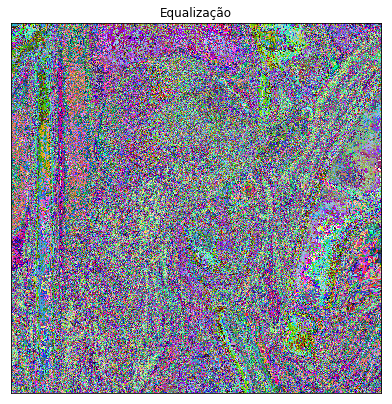

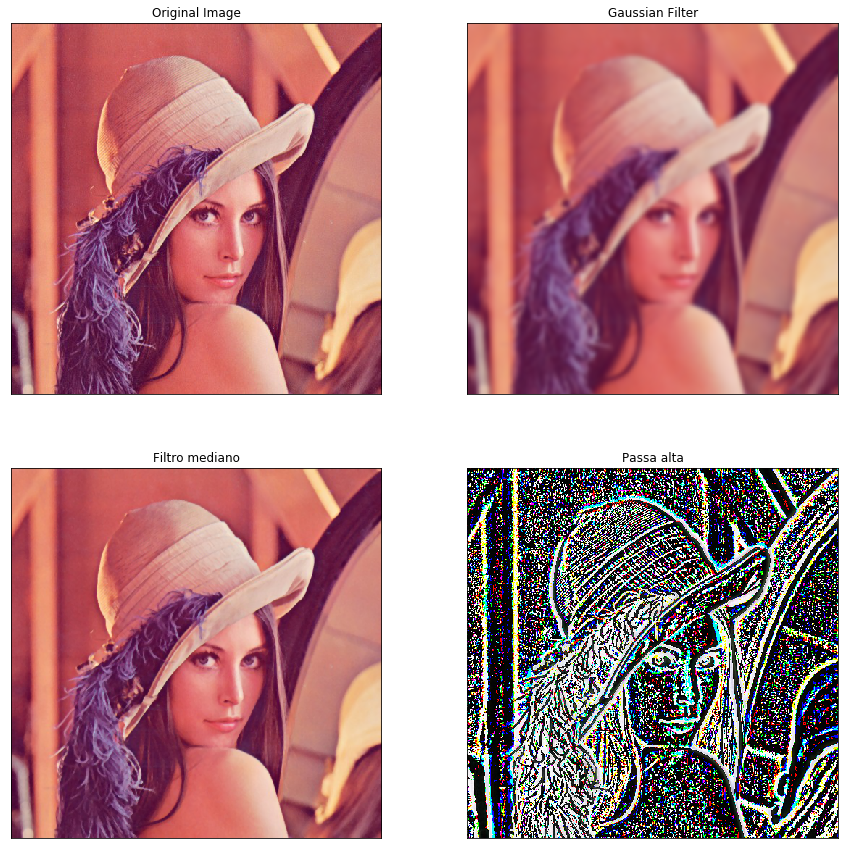

In [43]:
import scipy.ndimage as nd

fig = plt.figure(figsize=(15, 15))
plt.subplot(2,2,1),plt.imshow(hist_each(lena)),plt.title('Equalização')
plt.xticks([]), plt.yticks([])
plt.show()
fig = plt.figure(figsize=(15, 15))
plt.subplot(2,2,1),plt.imshow(lena),plt.title('Original Image') 
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(gaussian_each(lena)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(median_each(lena)), plt.title('Filtro mediano')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(highpass(lena)),plt.title('Passa baixa')
plt.xticks([]), plt.yticks([])
plt.show()

fig = plt.figure(figsize=(15, 15))

plt.show()





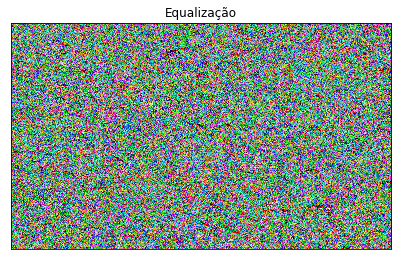

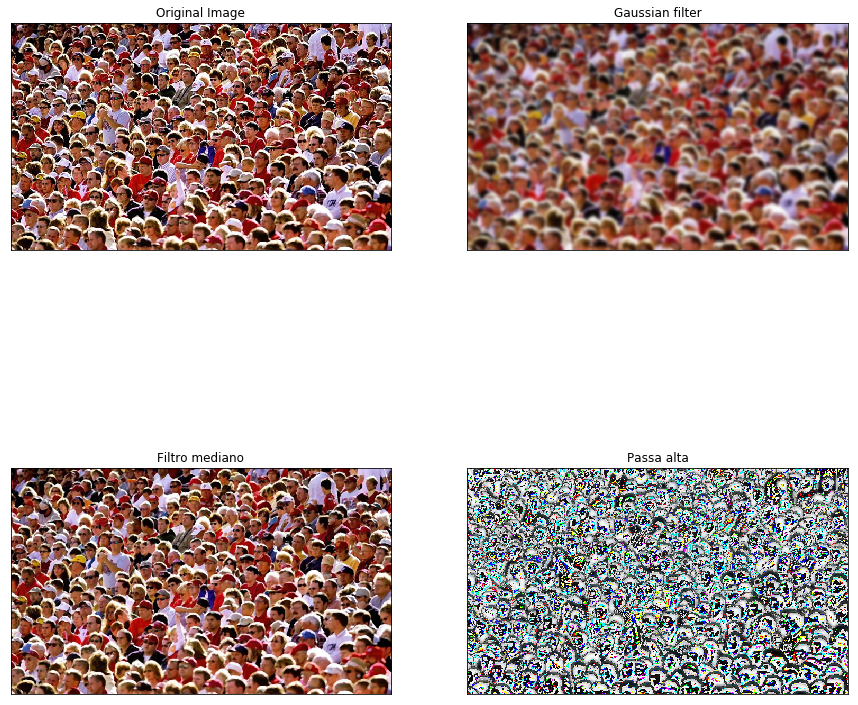

In [44]:
fig = plt.figure(figsize=(15, 15))
plt.subplot(2,2,1),plt.imshow(hist_each(crowd)),plt.title('Equalização')
plt.xticks([]), plt.yticks([])
plt.show()
fig = plt.figure(figsize=(15, 15))
plt.subplot(2,2,1),plt.imshow(crowd),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(gaussian_each(crowd)), plt.title('Gaussian filter')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(median_each(crowd)), plt.title('Filtro mediano')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(highpass(crowd)),plt.title('Passa baixa')
plt.xticks([]), plt.yticks([])
plt.show()

Parte 2 do exercicio 1

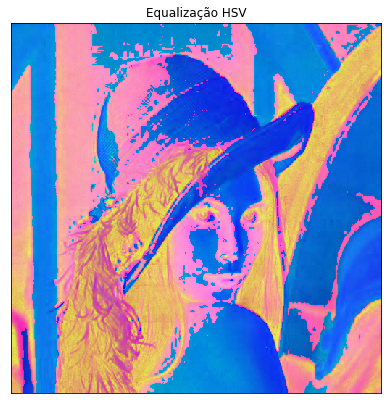

E:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


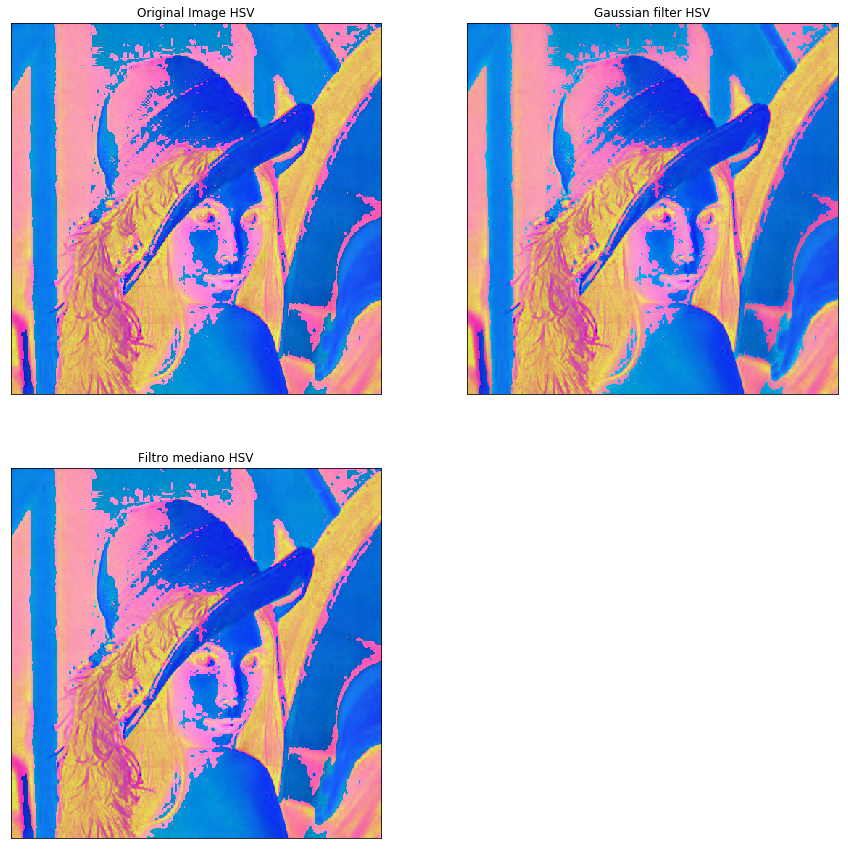

In [45]:
lena_hsv = skimage.color.convert_colorspace(lena,"RGB","HSV")

fig = plt.figure(figsize=(15, 15))
plt.subplot(2,2,1),plt.imshow(hist_hsv(lena_hsv)),plt.title('Equalização HSV')
plt.xticks([]), plt.yticks([])
plt.show()
fig = plt.figure(figsize=(15, 15))
plt.subplot(2,2,1),plt.imshow(lena_hsv),plt.title('Original Image HSV')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(gaussian_hsv(lena_hsv), cmap = 'hsv'), plt.title('Gaussian filter HSV')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(median_hsv(lena_hsv), cmap = 'hsv'), plt.title('Filtro mediano HSV')
plt.xticks([]), plt.yticks([])
#plt.subplot(2,2,4),plt.imshow(highpass_hsv(crowd_hsv), cmap = 'hsv'),plt.title('Passa baixa HSV')
#plt.xticks([]), plt.yticks([])
plt.show()

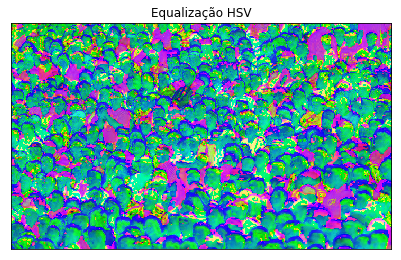

E:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


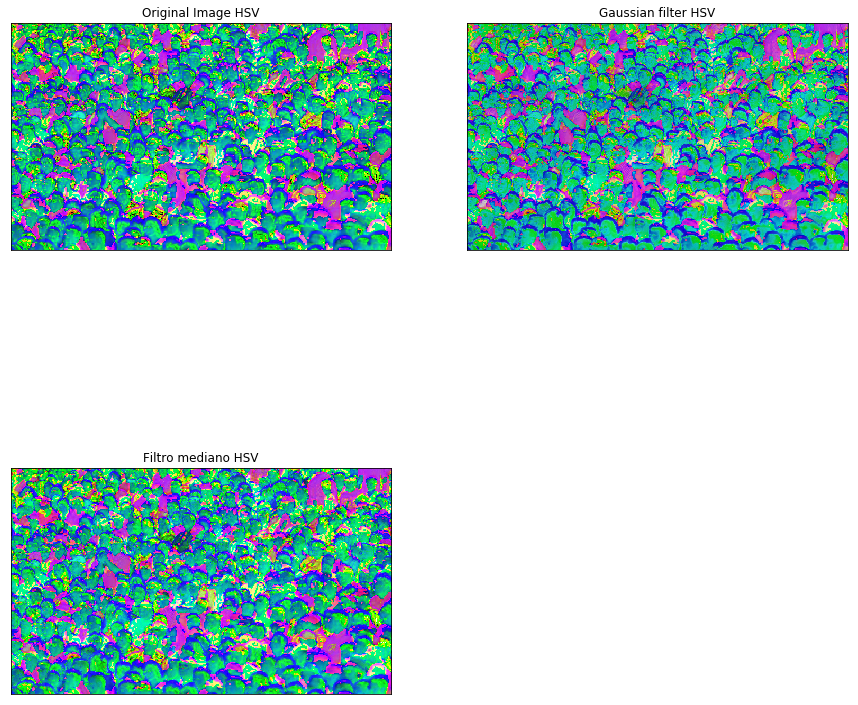

In [46]:
crowd_hsv = skimage.color.convert_colorspace(crowd,"RGB","HSV")

fig = plt.figure(figsize=(15, 15))
plt.subplot(2,2,1),plt.imshow(hist_hsv(crowd_hsv)),plt.title('Equalização HSV')
plt.xticks([]), plt.yticks([])
plt.show()
fig = plt.figure(figsize=(15, 15))
plt.subplot(2,2,1),plt.imshow(crowd_hsv),plt.title('Original Image HSV')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(gaussian_hsv(crowd_hsv), cmap = 'hsv'), plt.title('Gaussian filter HSV')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(median_hsv(crowd_hsv), cmap = 'hsv'), plt.title('Filtro mediano HSV')
plt.xticks([]), plt.yticks([])
#plt.subplot(2,2,4),plt.imshow(highpass_hsv(crowd_hsv), cmap = 'hsv'),plt.title('Passa baixa HSV')
#plt.xticks([]), plt.yticks([])
plt.show()

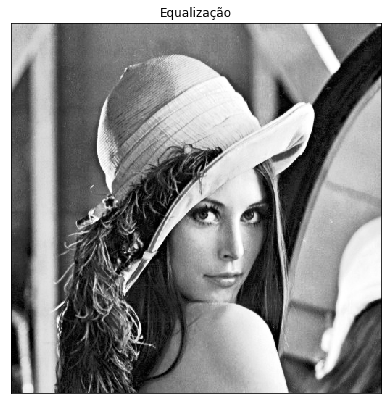

E:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


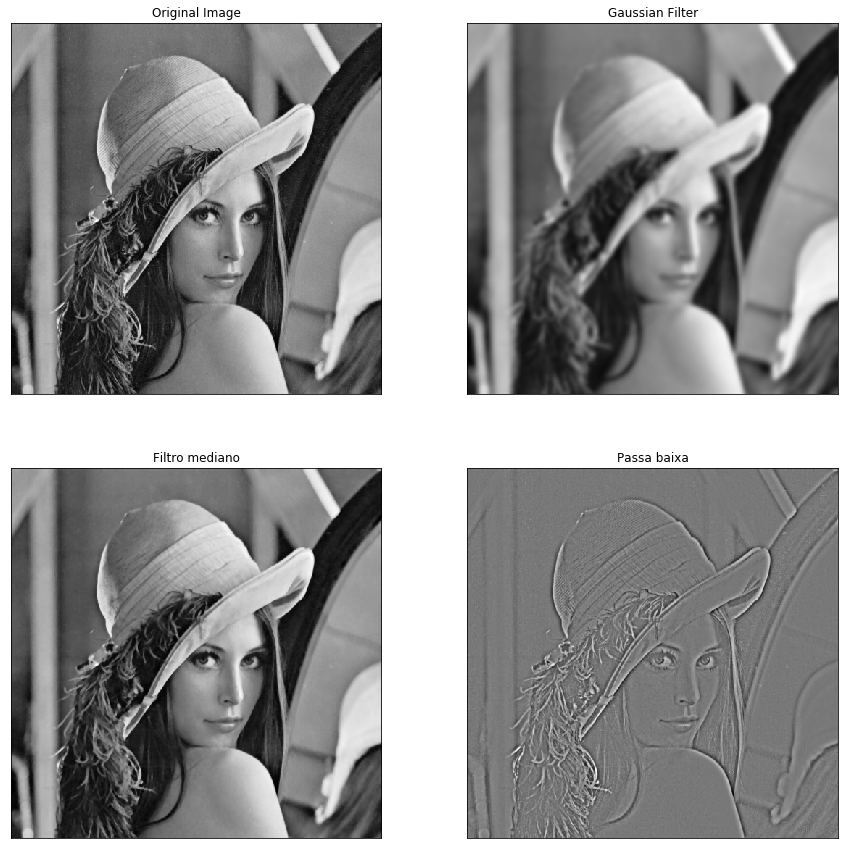

In [57]:
from skimage.color import rgb2gray
lena_gray = rgb2gray(lena)
fig = plt.figure(figsize=(15, 15))
plt.subplot(2,2,1),plt.imshow(histeq(lena_gray), cmap='gray'),plt.title('Equalização')
plt.xticks([]), plt.yticks([])
plt.show()
fig = plt.figure(figsize=(15, 15))
plt.subplot(2,2,1),plt.imshow(lena_gray, cmap='gray'),plt.title('Original Image') 
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(filters.gaussian(lena_gray,sigma=3), cmap='gray'),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(filters.median(lena_gray), cmap='gray'), plt.title('Filtro mediano')
plt.xticks([]), plt.yticks([])

lowpass = ndimage.gaussian_filter(lena_gray,3)
lena_lowpass =  lena_gray - lowpass
plt.subplot(2,2,4),plt.imshow(lena_lowpass, cmap='gray'),plt.title('Passa baixa')
plt.xticks([]), plt.yticks([])
plt.show()

fig = plt.figure(figsize=(15, 15))

plt.show()

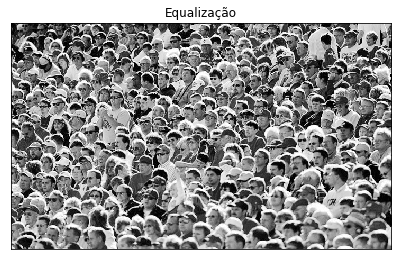

E:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


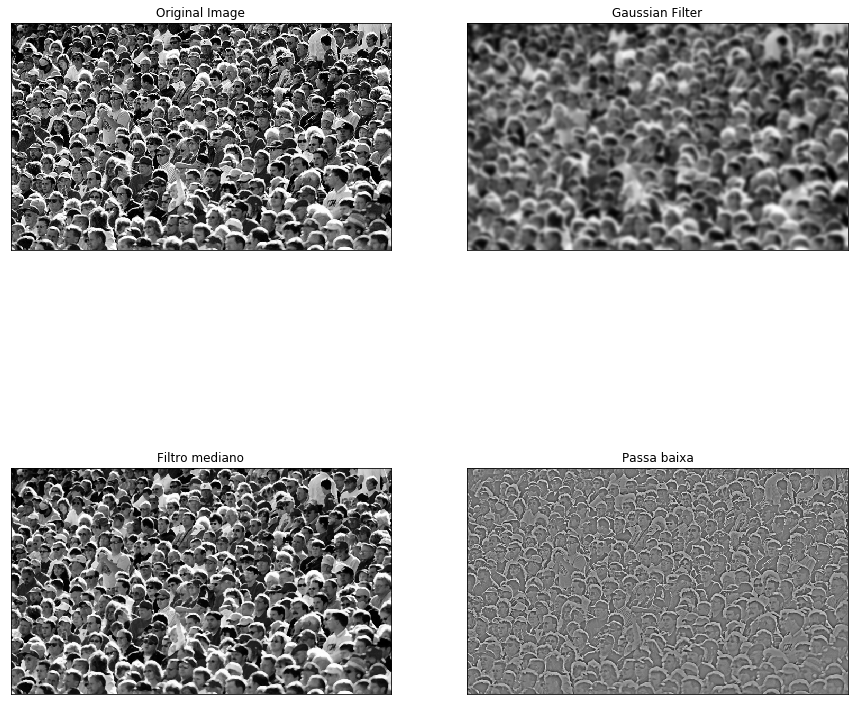

In [59]:
from skimage.color import rgb2gray
crowd_gray = rgb2gray(crowd)
fig = plt.figure(figsize=(15, 15))
plt.subplot(2,2,1),plt.imshow(histeq(crowd_gray), cmap='gray'),plt.title('Equalização')
plt.xticks([]), plt.yticks([])
plt.show()
fig = plt.figure(figsize=(15, 15))
plt.subplot(2,2,1),plt.imshow(crowd_gray, cmap='gray'),plt.title('Original Image') 
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(filters.gaussian(crowd_gray,sigma=3), cmap='gray'),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(filters.median(crowd_gray), cmap='gray'), plt.title('Filtro mediano')
plt.xticks([]), plt.yticks([])

lowpass = ndimage.gaussian_filter(crowd_gray,3)
crowd_lowpass =  crowd_gray - lowpass
plt.subplot(2,2,4),plt.imshow(crowd_lowpass, cmap='gray'),plt.title('Passa baixa')
plt.xticks([]), plt.yticks([])
plt.show()

fig = plt.figure(figsize=(15, 15))

plt.show()

Exercicio 3

Ao trabalhar com os filtros em imagens coloridas, os filtros Mediana e Gaussian atuam corretamente nas imagens de "Lena" e "Crowd" e tornando identificáveis enquanto os filtros de Passa-Baixa e Equalização torna difícil de se observar os detalhes.

Já ao trabalhar com HSV, foi notado uma leve mudança no filtro da Mediana, enquanto os outros não sofreram mudanças na imagem.

Ao trabalhar com imagens cinzas, todos filtros aplicaram mudanças nas fotos como deveria, e nos filtros de Equalização e Passa-baixa torna as imagens identificáveis podendo analisar melhor os detalhes da foto como as curvas no filtro de Passa-Baixa.

